In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#  Get Data as variables

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()
# train_data.info()
# train_data.describe()

Outliers below: 0
Outliers above: 61


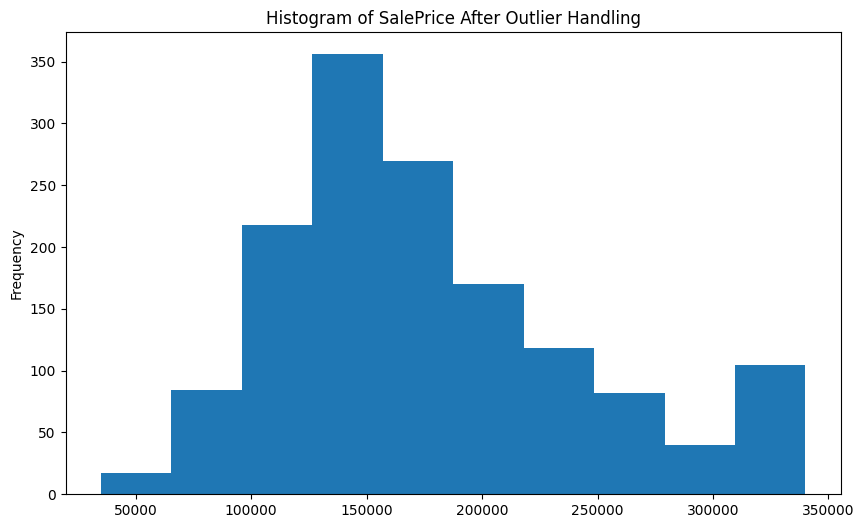

In [ ]:
# Handle Outliers

q1 = train_data['SalePrice'].quantile(0.25)
q3 = train_data['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


print(f"Outliers below: {(train_data['SalePrice'] < lower_bound).sum()}")
print(f"Outliers above: {(train_data['SalePrice'] > upper_bound).sum()}")

train_data["SalePrice"] = np.clip(train_data["SalePrice"],lower_bound, upper_bound)

# Visualize SalePrice After Outlier Handling
plt.figure(figsize=(10, 6))
plt.hist(train_data['SalePrice'])
plt.title('Histogram of SalePrice After Outlier Handling')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Amount of missing values')

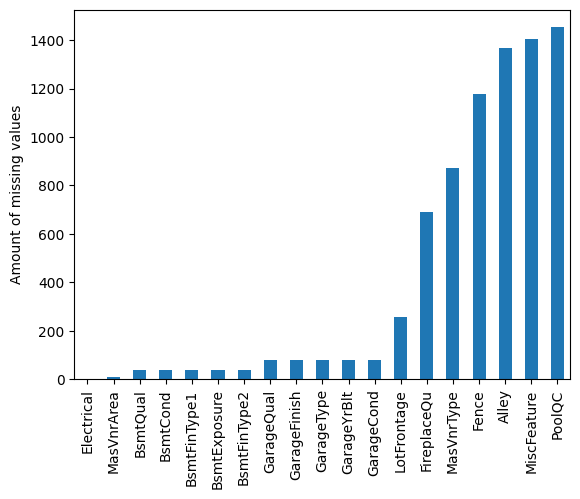

In [ ]:
# visualize missing values

missing = train_data.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.ylabel("Amount of missing values")

In [ ]:
# Fill missing values

# Train Data
num_cols = train_data.select_dtypes(include=[np.number]).columns
cat_cols = train_data.select_dtypes(exclude=[np.number]).columns

train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
for col in cat_cols:
  train_data[col].fillna(train_data[col].mode()[0], inplace=True)

print(f"Num of missing values: {train_data.isnull().sum().sum()}")

# Test Data

num_cols = test_data.select_dtypes(include=[np.number]).columns
cat_cols = test_data.select_dtypes(exclude=[np.number]).columns

test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].median()) # Fill missing cols with median
for col in cat_cols:
  test_data[col].fillna(test_data[col].mode()[0], inplace=True) # Fill missing cols with mode

print(f"Num of missing values: {test_data.isnull().sum().sum()}") # Print num of missing values

Num of missing values: 0
Num of missing values: 0


/tmp/ipython-input-1744978335.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
/tmp/ipython-input-1744978335.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# Fix the enconding
train_data = pd.get_dummies(train_data, drop_first=True)
print("New shape after encoding: ", train_data.shape)
train_data.head()

New shape after encoding:  (1460, 246)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Split the data
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']
print("X shape:",X.shape)
print("y shape:",y.shape)

X_train,X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:",X_train.shape,y_train.shape)
print("Validation set shape:",X_valid.shape,y_valid.shape)

X shape: (1460, 245)
y shape: (1460,)
Training set shape: (1168, 245) (1168,)
Validation set shape: (292, 245) (292,)


In [ ]:
# Building Models

# Build and Train The Model (RandomForestRegressor)

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=10
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_valid) # Predict

# Build and Train The model (Linear Regression)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_valid) # Predict

# Build and Train The Model (Decision Tree)

dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_valid) # Predict

In [ ]:
# Evaluating models

# RandomForestRegressor

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

# Linear Regression

rmse_lr = np.sqrt(mean_squared_error(y_valid, y_pred_lr))
r2_lr = r2_score(y_valid, y_pred_lr)

# DecisionTreeRegressor

rmse_dt = np.sqrt(mean_squared_error(y_valid, y_pred_dt))
r2_dt = r2_score(y_valid, y_pred_dt)

In [ ]:
# Print Evaluation

# Random forest

print("Random Forest:", rmse)
print("Random Forest R² Score:", r2)
print("\n")

# Linear Regression

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R² Score:", r2_lr)
print("\n")

# Decision Tree

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R² Score:", r2_dt)

Random Forest: 20977.853447123754
Random Forest R² Score: 0.9099922609716291


Linear Regression RMSE: 37266.79110953039
Linear Regression R² Score: 0.715945445942928


Decision Tree RMSE: 28741.28649822101
Decision Tree R² Score: 0.8310453433920919


In [ ]:
# Check for over fitting (Random Forest)

y_train_pred_rf = rf_model.predict(X_train)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

training_accuracy = round(r2_train_rf * 100, 2)
validation_accuracy = round(r2 * 100, 2)
training_error = round(rmse_train_rf, 2)
validation_error = round(rmse, 2)
print("Training Accuracy (%):", training_accuracy)
print("Validation Accuracy (%):", validation_accuracy)
print("Training Error ($):", training_error)
print("Validation Error ($):", validation_error)

Training Accuracy (%): 96.68
Validation Accuracy (%): 91.0
Training Error ($): 12114.81
Validation Error ($): 20977.85


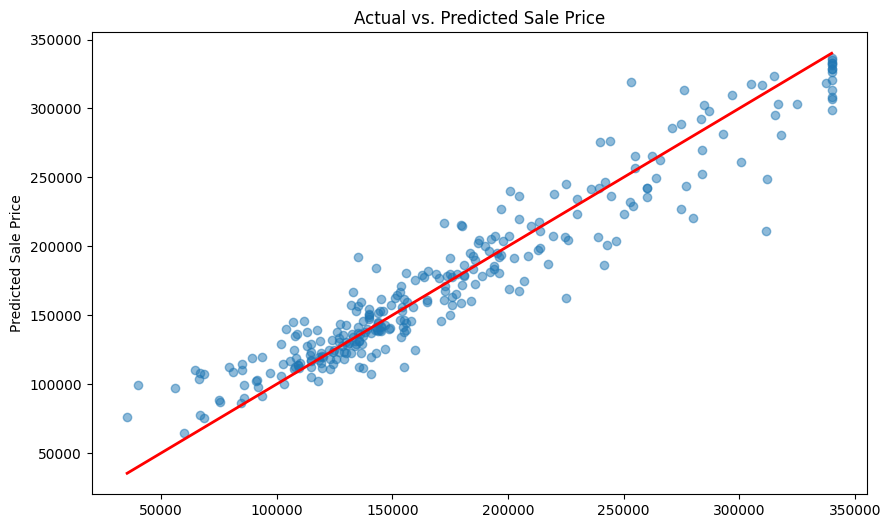

In [ ]:
# Visualize Model Performance (Train Data)

plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.5)
#plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price")
max_price = max(y_valid.max(), y_pred.max())
min_price = min(y_valid.min(), y_pred.min())
plt.plot([min_price, max_price], [min_price, max_price], color='red', linewidth=2)
plt.show()

Top 10 most important features:
              Feature  Importance
4         OverallQual    0.612455
16          GrLivArea    0.124158
12        TotalBsmtSF    0.037383
26         GarageCars    0.027662
9          BsmtFinSF1    0.027391
27         GarageArea    0.018966
13           1stFlrSF    0.016174
3             LotArea    0.014155
6           YearBuilt    0.011362
213  GarageFinish_Unf    0.007146


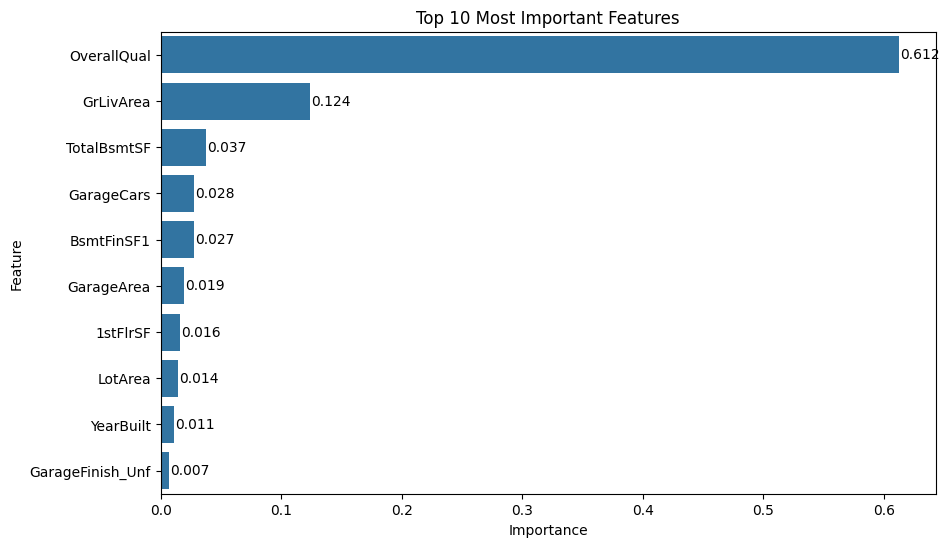

In [ ]:
# Interpreting
feature_importances = pd.DataFrame({
    "Feature": X_train.columns  ,
    "Importance": rf_model.feature_importances_
})

feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print("Top 10 most important features:")
print(feature_importances.head(10))


# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
plt.title("Top 10 Most Important Features")
for i, v in enumerate(feature_importances.head(10)["Importance"]):
    plt.text(v + 0.001, i, f"{v:.3f}", color='black', va='center')

plt.show()

In [ ]:
# Predict on Test Data
test_data = test_data.reindex(columns=X_train.columns, fill_value=0) # Match test data with training data
test_predictions = rf_model.predict(test_data) # Predict prices with model

submission = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,0,113955.871718
1,1,152358.718994
2,2,183790.824568
3,3,183157.869697
4,4,213462.892911


               Model  Validation Accuracy (%)  Validation RMSE
0  Linear Regression                    71.59         37266.79
1      Decision Tree                    83.10         28741.29
2      Random Forest                    91.00         20977.85


/tmp/ipython-input-841977847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Validation Accuracy (%)', data=model_results, palette='coolwarm')


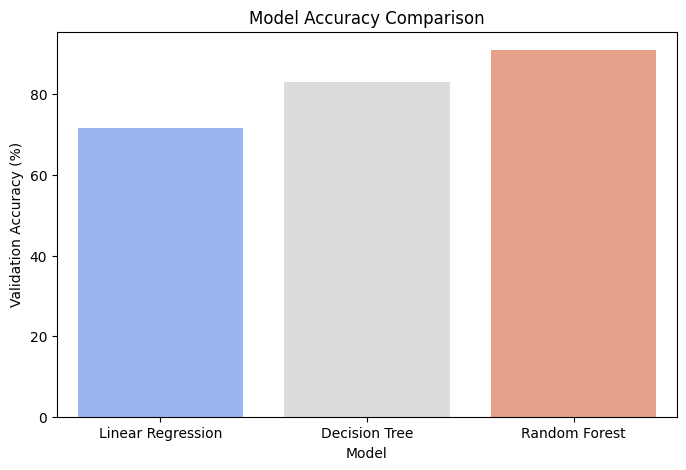

/tmp/ipython-input-841977847.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Validation RMSE', data=model_results, palette='coolwarm')


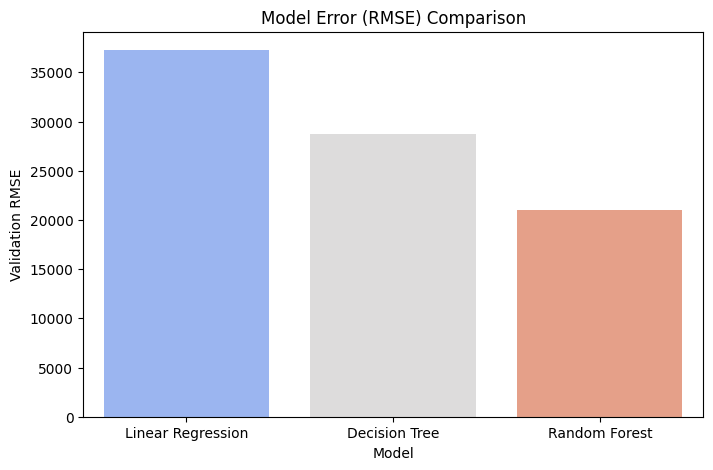

In [ ]:
# Compare the 3 modles

model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Validation Accuracy (%)': [round(r2_lr * 100, 2), round(r2_dt * 100, 2), round(r2 * 100, 2)],
    'Validation RMSE': [round(rmse_lr, 2), round(rmse_dt, 2), round(rmse, 2)]
})

print(model_results)

# Accuary Graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Validation Accuracy (%)', data=model_results, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Validation Accuracy (%)')
plt.show()

# Error Graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Validation RMSE', data=model_results, palette='coolwarm')
plt.title('Model Error (RMSE) Comparison')
plt.ylabel('Validation RMSE')
plt.show()